In [25]:
%matplotlib inline

In [27]:
from gen_figs import load_results
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd

In [28]:
observations = pd.read_json("/data/dzeiberg/mave_calibration/processed_datasets/Jia_MSH2_SSM_pipeline_A.json")

In [32]:
rng = np.arange(*observations.scores.min(), *observations.scores.max(), 0.01)

In [16]:
results = load_results("Jia_MSH2_SSM_pipeline_A",[Path("/data/dzeiberg/mave_calibration/results_10_09_24/")],
                        includes_synonymous=False)

In [17]:
len(results)

5000

In [33]:
from joblib import Parallel, delayed
from utils.threshold_utils import get_log_lrPlus

In [34]:
log_LRs = Parallel(n_jobs=-1,verbose=10)(delayed(get_log_lrPlus)(rng,1,r) for r in results)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01458287239074707s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)

In [35]:
LLR = np.stack(log_LRs)

Text(0, 0.5, '$ \\log LR^{+} $')

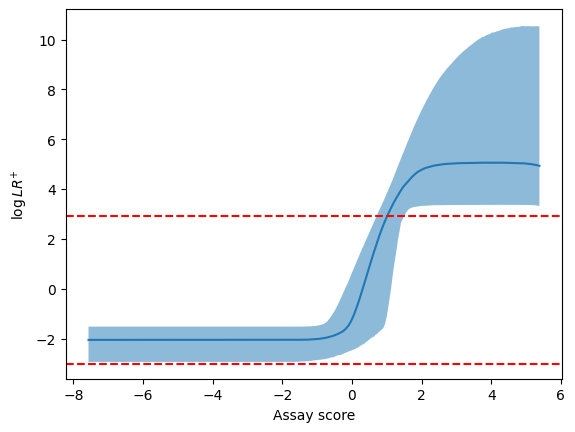

In [56]:
plt.plot(rng, np.median(LLR,axis=0))
plt.fill_between(rng, *np.percentile(LLR,[2.5,97.5],axis=0),alpha=0.5)
ax = plt.gca()
# secax = ax.secondary_yaxis('right', functions=(lambda x: np.exp(x), lambda x: np.log(x)))
plt.axhline(np.log(.05),color='red',linestyle='--')
plt.axhline(np.log(18.7),color='red',linestyle='--')
plt.xlabel("Assay score")
plt.ylabel(r"$ \log LR^{+} $")


In [60]:
np.exp(np.quantile(LLR, [.025,.5,.975],axis=0)[:,0])

array([0.05330416, 0.12904523, 0.21963694])

In [46]:
np.log(.05)

np.float64(-2.995732273553991)